<a href="https://colab.research.google.com/github/Joyslin-2006/PRODIGY_ML_04/blob/main/HandGesture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import tensorflow as tf
from tensorflow.keras import layers, models
import cv2
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [4]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [5]:
print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)

Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


In [7]:
model = models.Sequential([
    # Convolutional layer and pooling
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    # Add another convolutional layer and pooling
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Flatten the output and add dense layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # CIFAR-10 has 10 classes
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 315,722 (1.20 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=64)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 59s 75ms/step - accuracy: 0.8019 - loss: 0.5715 - val_accuracy: 0.7080 - val_loss: 0.8988
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 72ms/step - accuracy: 0.8270 - loss: 0.5035 - val_accuracy: 0.7050 - val_loss: 0.9248
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 57s 73ms/step - accuracy: 0.8449 - loss: 0.4469 - val_accuracy: 0.7099 - val_loss: 0.9211
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 58s 74ms/step - accuracy: 0.8627 - loss: 0.3974 - val_accuracy: 0.7095 - val_loss: 0.9780
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 73ms/step - accuracy: 0.8782 - loss: 0.3555 - val_accuracy: 0.7112 - val_loss: 1.0305
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 57s 72ms/step - accuracy: 0.8948 - loss: 0.3071 - val_accuracy: 0.7025 - val_loss: 1.0856
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 58s 74ms/step - accuracy: 0.9106 - loss: 0.2662 - val_accuracy: 0.7020 - val_loss: 1.1292
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 72ms/step - accuracy: 0.9261 - loss: 0.2224 - 

In [12]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc * 100:.2f}%")

313/313 - 4s - 11ms/step - accuracy: 0.6968 - loss: 1.3882
Test accuracy: 69.68%


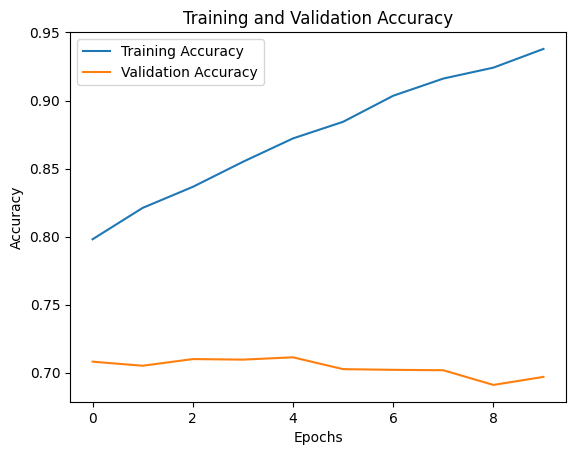

In [14]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

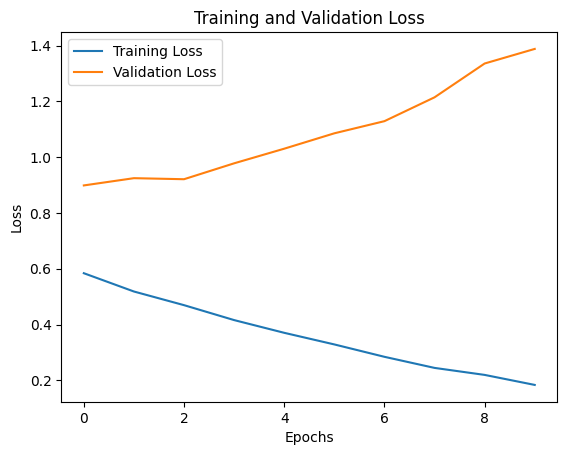

In [15]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [16]:
predictions = model.predict(x_test[:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


In [17]:
predicted_classes = [tf.argmax(pred).numpy() for pred in predictions]

In [18]:
print("Predicted classes:", predicted_classes)
print("True labels:", y_test[:10].flatten())

Predicted classes: [3, 8, 1, 0, 6, 6, 1, 6, 3, 1]
True labels: [3 8 8 0 6 6 1 6 3 1]


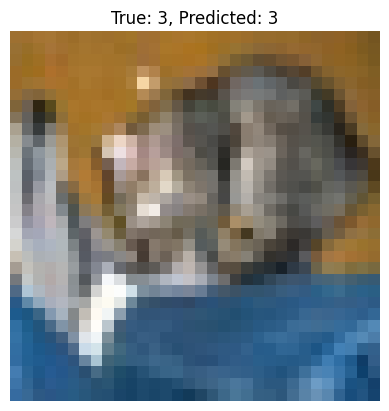

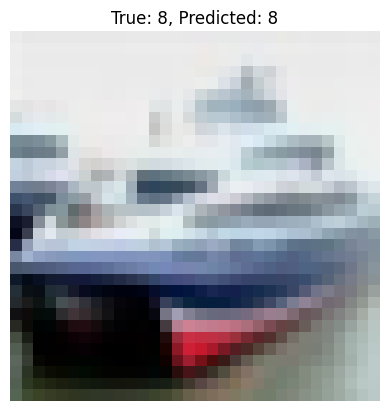

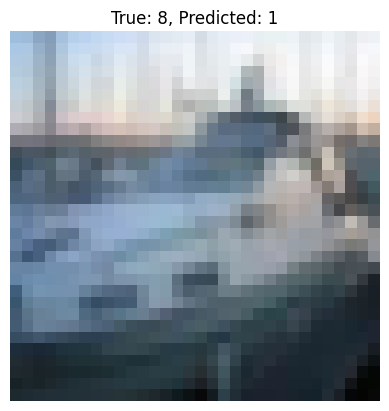

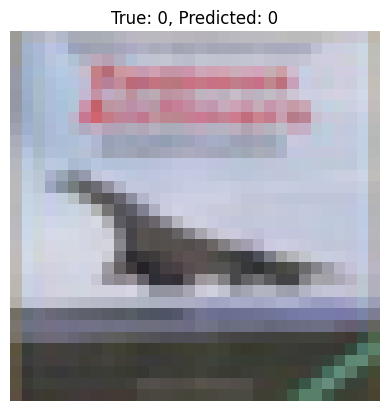

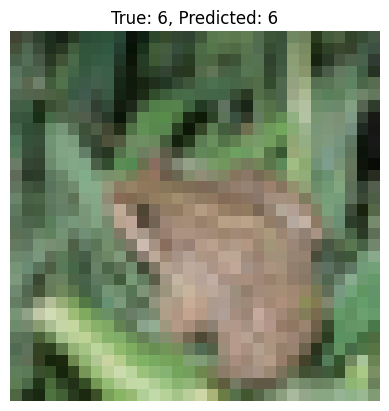

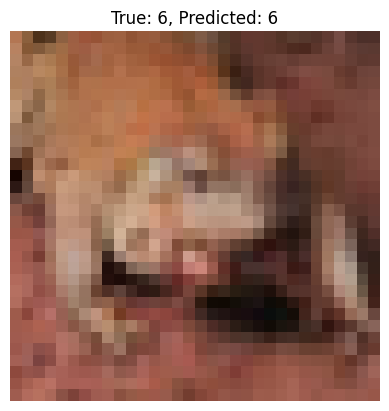

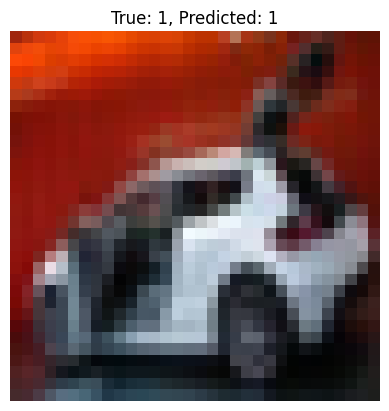

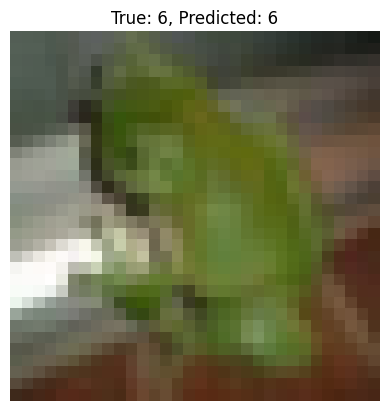

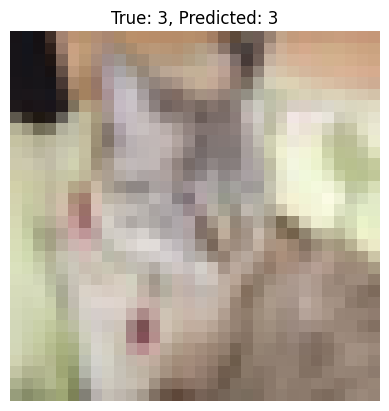

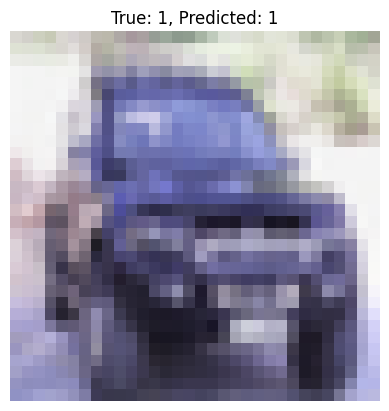

In [20]:
for i in range(10):
    plt.imshow(x_test[i])
    plt.title(f"True: {y_test[i][0]}, Predicted: {predicted_classes[i]}")
    plt.axis('off')
    plt.show()

In [21]:
layers.Dropout(0.5)

<Dropout name=dropout, built=False>

In [23]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)
datagen.fit(x_train)

In [25]:
index = 0
test_image = x_test[index]
true_label = y_test[index][0]  # True label
predicted_label = tf.argmax(model.predict(test_image.reshape(1, 32, 32, 3)), axis=-1).numpy()[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


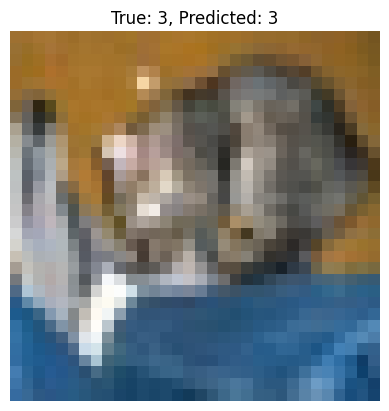

In [26]:
plt.imshow(test_image)
plt.title(f"True: {true_label}, Predicted: {predicted_label}")
plt.axis('off')
plt.show()

In [27]:
gesture_labels = {0: "Thumbs Up", 1: "Palm", 2: "Fist", 3: "Peace", 4: "Pointing"}

In [28]:
true_label_name = gesture_labels[true_label]
predicted_label_name = gesture_labels[predicted_label]

Text(0.5, 1.0, 'True: Peace, Predicted: Peace')

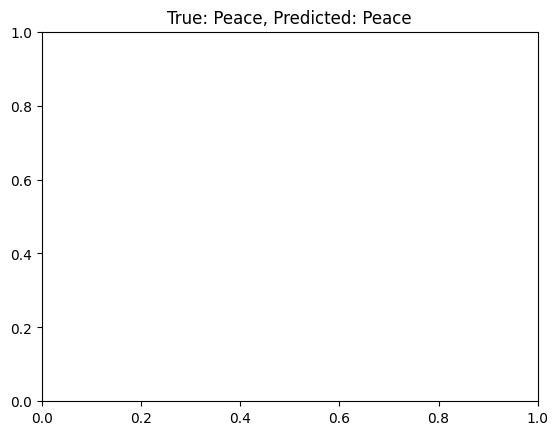

In [29]:
plt.title(f"True: {true_label_name}, Predicted: {predicted_label_name}")

In [31]:
index = 0
test_image = x_test[index]

In [32]:
resized_image = cv2.resize(test_image, (128, 128))

In [33]:
rue_label = y_test[index][0]  # True label
predicted_label = tf.argmax(model.predict(test_image.reshape(1, 32, 32, 3)), axis=-1).numpy()[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


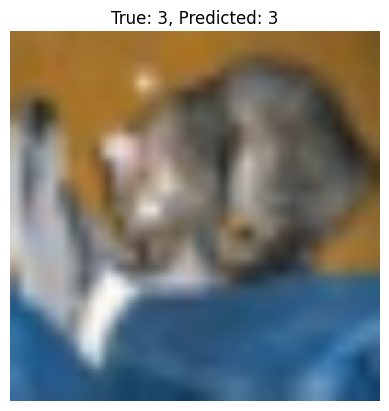

In [34]:
plt.imshow(resized_image)
plt.title(f"True: {true_label}, Predicted: {predicted_label}")
plt.axis('off')
plt.show()

In [35]:
gesture_labels = {0: "Thumbs Up", 1: "Palm", 2: "Fist", 3: "Peace", 4: "Pointing"}

In [36]:
true_label_name = gesture_labels[true_label]
predicted_label_name = gesture_labels[predicted_label]

Text(0.5, 1.0, 'True: Peace, Predicted: Peace')

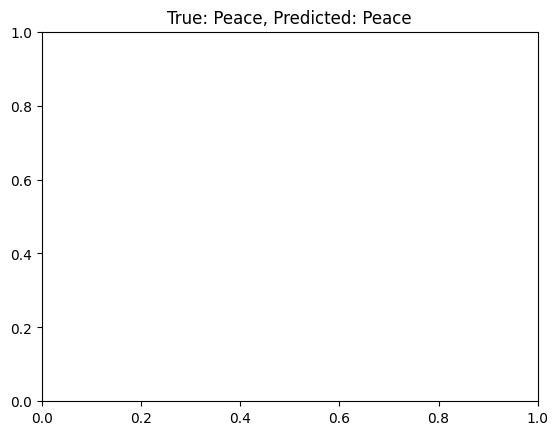

In [37]:
plt.title(f"True: {true_label_name}, Predicted: {predicted_label_name}")